<h1>Goal :decide if the customer will churn</h1> 

first import the required libraries 

In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.3 numpy==1.21.2 ipywidgets==7.4.2 scipy==7.4.2 tqdm==4.62.3 matplotlib==3.5.0 seaborn==0.9.0

# install imbalanced-learn package
!pip install imbalanced-learn==0.8.0

# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

load our dataset

In [3]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML201EN-SkillsNetwork/labs/module_4/datasets/im_churn.csv", index_col=False)
churn_df.head()

,tenure,MonthlyCharges,TotalCharges,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,MultipleLines_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Class
0,27,70.55,1943.90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1,69,93.30,6398.05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,55,59.20,3175.85,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,49,59.60,2970.30,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,72,109.55,7887.25,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


see the info of the data


In [4]:
churn_df.describe()

,tenure,MonthlyCharges,TotalCharges,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,MultipleLines_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Class
count,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,...,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000
mean,34.400551,63.414440,2385.697668,0.503401,0.496599,0.680920,0.319080,0.098316,0.901684,0.098316,...,0.503887,0.226595,0.269517,0.570619,0.429381,0.300615,0.238257,0.230969,0.230159,0.161970
std,24.498675,30.564605,2292.243923,0.500029,0.500029,0.466158,0.466158,0.297765,0.297765,0.297765,...,0.500025,0.418663,0.443745,0.495028,0.495028,0.458563,0.426052,0.421486,0.420968,0.368453
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,29.112500,467.237500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,69.275000,1498.450000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,89.550000,3981.675000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
churn_df.dtypes

tenure                  int64
MonthlyCharges        float64
TotalCharges          float64
Partner_0             float64
Partner_1             float64
Dependents_0          float64
Dependents_1          float64
PhoneService_0        float64
PhoneService_1        float64
MultipleLines_0       float64
MultipleLines_1       float64
MultipleLines_2       float64
InternetService_0     float64
InternetService_1     float64
InternetService_2     float64
OnlineSecurity_0      float64
OnlineSecurity_1      float64
OnlineSecurity_2      float64
OnlineBackup_0        float64
OnlineBackup_1        float64
OnlineBackup_2        float64
DeviceProtection_0    float64
DeviceProtection_1    float64
DeviceProtection_2    float64
TechSupport_0         float64
TechSupport_1         float64
TechSupport_2         float64
StreamingTV_0         float64
StreamingTV_1         float64
StreamingTV_2         float64
StreamingMovies_0     float64
StreamingMovies_1     float64
StreamingMovies_2     float64
Contract_0

the data have already been preprocessed and relabeled using one hot encoding

next I want to see which feature affect our target the most
I will use corr,pairplot or heatmap or barchart

In [6]:
corr=churn_df.corr()
corr

,tenure,MonthlyCharges,TotalCharges,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,MultipleLines_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Class
tenure,1.000000,0.272512,0.812876,0.365118,-0.365118,-0.140785,0.140785,-0.013061,0.013061,-0.013061,...,-0.628706,0.166686,0.551181,0.030574,-0.030574,-0.180860,-0.257003,0.234491,0.222339,-0.294296
MonthlyCharges,0.272512,1.000000,0.688749,0.100510,-0.100510,0.112421,-0.112421,-0.223493,0.223493,-0.223493,...,0.049594,0.009475,-0.064823,0.354621,-0.354621,0.264257,-0.376095,0.048473,0.044247,0.159967
TotalCharges,0.812876,0.688749,1.000000,0.300848,-0.300848,-0.043029,0.043029,-0.115087,0.115087,-0.115087,...,-0.418614,0.140544,0.339108,0.185567,-0.185567,-0.029918,-0.314577,0.174587,0.176164,-0.162966
Partner_0,0.365118,0.100510,0.300848,1.000000,-1.000000,-0.454033,0.454033,-0.019111,0.019111,-0.019111,...,-0.269585,0.063254,0.244098,-0.001625,0.001625,-0.072284,-0.100757,0.102345,0.078242,-0.112901
Partner_1,-0.365118,-0.100510,-0.300848,-1.000000,1.000000,0.454033,-0.454033,0.019111,-0.019111,0.019111,...,0.269585,-0.063254,-0.244098,0.001625,-0.001625,0.072284,0.100757,-0.102345,-0.078242,0.112901
Dependents_0,-0.140785,0.112421,-0.043029,-0.454033,0.454033,1.000000,-1.000000,-0.003873,0.003873,-0.003873,...,0.216599,-0.051967,-0.195041,0.101172,-0.101172,0.138086,-0.048640,-0.045340,-0.055794,0.125517
Dependents_1,0.140785,-0.112421,0.043029,0.454033,-0.454033,-1.000000,1.000000,0.003873,-0.003873,0.003873,...,-0.216599,0.051967,0.195041,-0.101172,0.101172,-0.138086,0.048640,0.045340,0.055794,-0.125517
PhoneService_0,-0.013061,-0.223493,-0.115087,-0.019111,0.019111,-0.003873,0.003873,1.000000,-1.000000,1.000000,...,0.000153,0.004492,-0.004410,-0.010293,0.010293,0.000625,0.000483,-0.009291,0.008134,-0.004896
PhoneService_1,0.013061,0.223493,0.115087,0.019111,-0.019111,0.003873,-0.003873,-1.000000,1.000000,-1.000000,...,-0.000153,-0.004492,0.004410,0.010293,-0.010293,-0.000625,-0.000483,0.009291,-0.008134,0.004896
MultipleLines_0,-0.013061,-0.223493,-0.115087,-0.019111,0.019111,-0.003873,0.003873,1.000000,-1.000000,1.000000,...,0.000153,0.004492,-0.004410,-0.010293,0.010293,0.000625,0.000483,-0.009291,0.008134,-0.004896


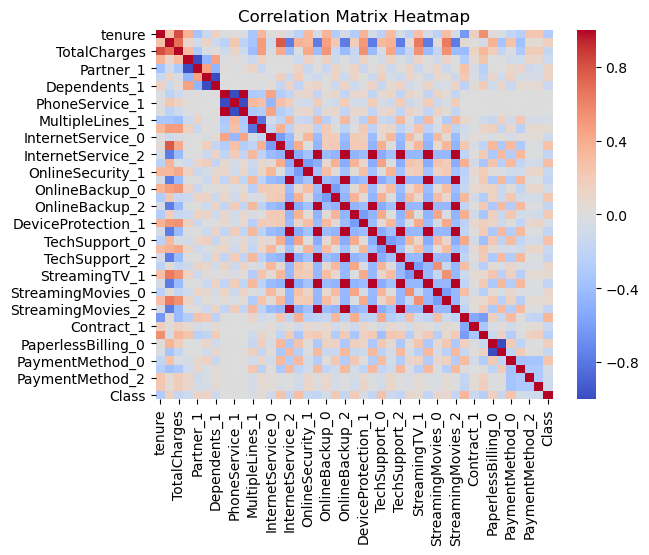

In [10]:
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

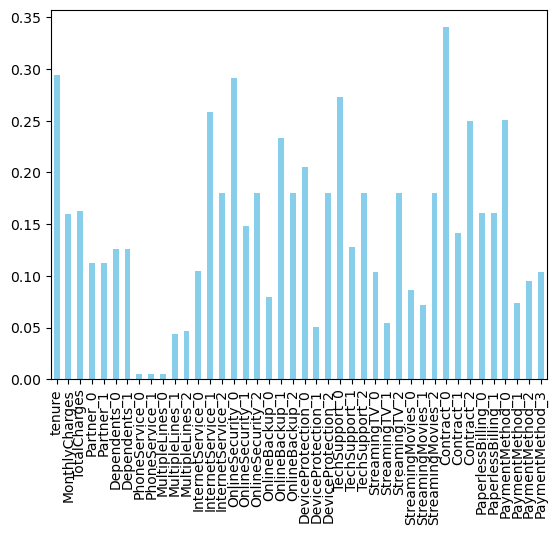

In [27]:
features=churn_df.drop(columns='Class',axis=1)
y=churn_df['Class']
figure,ax= plt.subplots()
ax=features.corrwith(y).abs().plot(kind='bar', color='skyblue')

In [34]:
features.corrwith(y).abs().sort_values(ascending=False)>0.2

Contract_0             True
tenure                 True
OnlineSecurity_0       True
TechSupport_0          True
InternetService_1      True
PaymentMethod_0        True
Contract_2             True
OnlineBackup_1         True
DeviceProtection_0     True
StreamingMovies_2     False
TechSupport_2         False
InternetService_2     False
OnlineSecurity_2      False
DeviceProtection_2    False
StreamingTV_2         False
OnlineBackup_2        False
TotalCharges          False
PaperlessBilling_1    False
PaperlessBilling_0    False
MonthlyCharges        False
OnlineSecurity_1      False
Contract_1            False
TechSupport_1         False
Dependents_1          False
Dependents_0          False
Partner_0             False
Partner_1             False
InternetService_0     False
StreamingTV_0         False
PaymentMethod_3       False
PaymentMethod_2       False
StreamingMovies_0     False
OnlineBackup_0        False
PaymentMethod_1       False
StreamingMovies_1     False
StreamingTV_1       

I choose features with corr>0.2 as our new features

In [38]:
X=churn_df[['Contract_0','tenure','OnlineSecurity_0','TechSupport_0','InternetService_1','PaymentMethod_0','Contract_2','OnlineBackup_1','DeviceProtection_0']]
y=churn_df['Class']

train/test

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [41]:
y_train.value_counts(normalize=True)

0    0.838
1    0.162
Name: Class, dtype: float64

In [42]:
y_test.value_counts(normalize=True)

0    0.8381
1    0.1619
Name: Class, dtype: float64

we see that the class is a little bit unbalanced. we could use unbalanced method if necessary.

let's build model

since svm, knn, logisticregression are sensitive to scale I will do scaling first
there is little effect on decision tree

In [90]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd

scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)


knn = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear')
tree = DecisionTreeClassifier()
svm = SVC(probability=True)  

params_knn = {'n_neighbors': [5, 10, 15]} 
params_lr = {'penalty': ['l1', 'l2', 'none'], 'C': [0.1, 5, 10]} 
params_tree = {'max_depth': [1, 2, 3, 4, 5, 6]}
params_svm = {'kernel': ['linear', 'rbf', 'poly']}

results = []


def fit_evaluate_model(model, params, label):
    search = GridSearchCV(estimator=model, param_grid=params, scoring='f1', cv=5)
    search.fit(X_train_ss, y_train)
    
    ypred = search.best_estimator_.predict(X_test_ss)
    
    if hasattr(search.best_estimator_, "predict_proba"):
        ypred_proba = search.best_estimator_.predict_proba(X_test_ss)[:, 1]
    else:
        ypred_proba = ypred 
    
    accuracy = accuracy_score(y_test, ypred)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, ypred, beta=5, average='binary', zero_division=0)
    auc = roc_auc_score(y_test, ypred_proba)
    
    evaluate = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'fscore': fscore,
        'auc': auc
    }
    
    results.append(pd.Series(evaluate, name=label))


fit_evaluate_model(knn, params_knn, 'KNN')
fit_evaluate_model(lr, params_lr, 'Logistic Regression')
fit_evaluate_model(tree, params_tree, 'Decision Tree')
fit_evaluate_model(svm, params_svm, 'SVM')

results_df = pd.concat(results, axis=1)
print(results_df)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/l

                KNN  Logistic Regression  Decision Tree       SVM
accuracy   0.835402             0.846735       0.848354  0.842418
precision  0.486631             0.554054       0.549738  0.535714
recall     0.303333             0.273333       0.350000  0.200000
fscore     0.307792             0.278766       0.354960  0.204940
auc        0.818652             0.847140       0.819965  0.724815


as we can see each model have good performance on auc and accuracy but bad on recall and fscore 
so we might have to use oversampling or undersampling, it seems decision tree performs the best

In [92]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import  RandomUnderSampler

In [95]:
ros=RandomOverSampler(random_state=42)
smote=SMOTE(random_state=42)
rus=RandomUnderSampler(random_state=42)

In [96]:
x_ros,y_ros=ros.fit_resample(X_train_ss,y_train)
x_smote,y_smote=smote.fit_resample(X_train_ss,y_train)
x_rus,y_rus=rus.fit_resample(X_train_ss,y_train)

In [136]:
knn = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear')
tree = DecisionTreeClassifier()
svm = SVC(probability=True)  

params_knn = {'n_neighbors': [5, 10, 15]} 
params_lr = {'penalty': ['l1', 'l2'], 'C': [0.1, 5, 10]} 
params_tree = {'max_depth': [1, 2, 3, 4, 5, 6]}
params_svm = {'kernel': ['linear', 'rbf', 'poly']}



def fit_evaluate_model(model, params, label,X_train,y_train,results):
    search = GridSearchCV(estimator=model, param_grid=params, scoring='f1', cv=5,error_score='raise')
    search.fit(X_train, y_train)
    
    ypred = search.best_estimator_.predict(X_test_ss)
    
    if hasattr(search.best_estimator_, "predict_proba"):
        ypred_proba = search.best_estimator_.predict_proba(X_test_ss)[:, 1]
    else:
        ypred_proba = ypred 
    
    accuracy = accuracy_score(y_test, ypred)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, ypred, beta=5, average='binary', zero_division=0)
    auc = roc_auc_score(y_test, ypred_proba)
    
    evaluate = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'fscore': fscore,
        'auc': auc
    }
    
    results.append(pd.Series(evaluate, name=label))
    return results

ros result

In [143]:
results1=[]
results_df1=fit_evaluate_model(lr, params_lr, 'Logistic Regression',x_ros,y_ros,results1)[0]
print(results_df1)

accuracy     0.733405
precision    0.358187
recall       0.816667
fscore       0.778348
auc          0.845131
Name: Logistic Regression, dtype: float64


smote result

In [141]:
results2=[]
results_df2=fit_evaluate_model(lr, params_lr, 'Logistic Regression',x_smote,y_smote,results2)[0]
print(results_df2)

[accuracy     0.737183
precision    0.361481
recall       0.813333
fscore       0.776024
auc          0.846447
Name: Logistic Regression, dtype: float64]


rus result

In [144]:
results3=[]
results_df3=fit_evaluate_model(lr, params_lr, 'Logistic Regression',x_rus,y_rus,results3)[0]
print(results_df3)

accuracy     0.731247
precision    0.355685
recall       0.813333
fscore       0.774982
auc          0.845434
Name: Logistic Regression, dtype: float64


In [151]:
# 打印各个结果以查看其结构
print("results_df1:", results_df1)
print("results_df2:", results_df2)
print("results_df3:", results_df3)

results_df1: accuracy     0.733405
precision    0.358187
recall       0.816667
fscore       0.778348
auc          0.845131
Name: Logistic Regression, dtype: float64
results_df2: [accuracy     0.737183
precision    0.361481
recall       0.813333
fscore       0.776024
auc          0.846447
Name: Logistic Regression, dtype: float64]
results_df3: accuracy     0.731247
precision    0.355685
recall       0.813333
fscore       0.774982
auc          0.845434
Name: Logistic Regression, dtype: float64


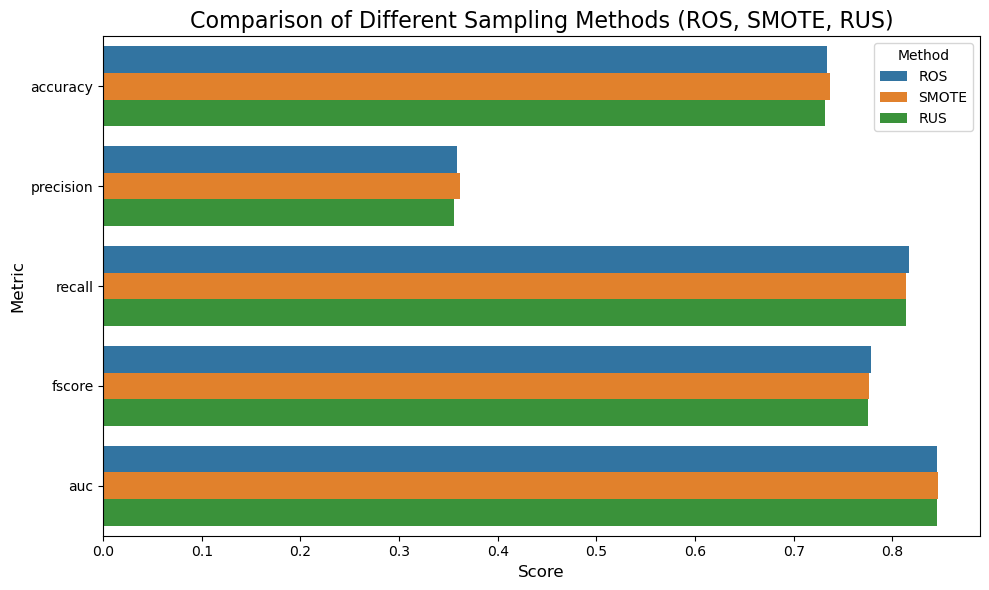

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 假设你已经获得了每种方法（ROS, SMOTE, RUS）的评估结果
# results1, results2, results3 分别是对 ROS, SMOTE, RUS 的评估结果

# 将每个评估结果（包括五个评分）转换为 DataFrame 格式，并添加方法标签
metrics = ['accuracy', 'precision', 'recall', 'fscore', 'auc']
methods = ['ROS', 'SMOTE', 'RUS']

# 提取每个方法的结果并放入一个字典中
data = {
    'Metric': [],
    'Score': [],
    'Method': []
}

# 填充数据
for metric in metrics:
    data['Metric'].extend([metric] * len(methods))  # 每个评分对应三个方法
    # 从results_df2中提取Series对象，确保所有列表索引都正确
    data['Score'].extend([results_df1[metric], results_df2[0][metric], results_df3[metric]])  # 各方法的评分
    data['Method'].extend(methods)  # 方法名称

# 创建 DataFrame
results_df = pd.DataFrame(data)

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Metric', hue='Method', data=results_df)

# 添加标题和标签
plt.title('Comparison of Different Sampling Methods (ROS, SMOTE, RUS)', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Metric', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()

as we can see from the result oversampling and undersampling unbalanced method increases our modelperformance

we have better fscore(we set beta=5 to focus more on recall since we may want to find out more actual churn of customer)and recall.

however, we have less precision since the increase of FP rate

Thus, this proves that deal with this unbalanced is really important